In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS, utils
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm

# Read in Cosmos Catalogue

In [2]:
catalogue = "data/MIGHTEE_Continuum_Early_Science_COSMOS_Level1.fits"
with fits.open(catalogue, memmap=True) as hdul_cat:
    hdul_cat.info()
    df = pd.DataFrame(hdul_cat[1].data)

Filename: data/MIGHTEE_Continuum_Early_Science_COSMOS_Level1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1                1 BinTableHDU     95   9896R x 29C   [19A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, J, J, J]   


In [3]:
catalogue = "data/MIGHTEE_Continuum_Early_Science_COSMOS_Level1.fits"
with fits.open(catalogue, memmap=True) as hdul_cat:
    hdul_cat.info()
    df = pd.DataFrame(hdul_cat[1].data)
df.head()

Filename: data/MIGHTEE_Continuum_Early_Science_COSMOS_Level1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1                1 BinTableHDU     95   9896R x 29C   [19A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, J, J, J]   


NAME          RA     E_RA      DEC    E_DEC     S_INT  \
0  J100320.73+020931.7  150.836411  0.00029  2.15882  0.00030  0.000104   
1  J100320.26+021312.7  150.834427  0.00003  2.22022  0.00008  0.000370   
2  J100319.37+021447.2  150.830734  0.00011  2.24645  0.00013  0.000075   
3  J100318.49+021000.5  150.827057  0.00016  2.16682  0.00021  0.000061   
4  J100317.73+021606.7  150.823883  0.00007  2.26855  0.00008  0.000164   

    E_S_INT    S_PEAK  E_S_PEAK        NU_EFF  ...    E_IM_PA  THETA_MAJ  \
0  0.000029  0.000056  0.000011  1.304066e+09  ...  25.103121    0.00317   
1  0.000024  0.000248  0.000010  1.304925e+09  ...   4.725640    0.00274   
2  0.000016  0.000079  0.000009  1.305699e+09  ...  50.223122    0.00057   
3  0.000018  0.000058  0.000010  1.306541e+09  ...  31.520969    0.00138   
4  0.000019  0.000142  0.000010  1.306922e+09  ...  89.285698    0.00104   

   E_THETA_MAJ  THETA_MIN  E_THETA_MIN  RESOLVED   ISL_RMS  GAUS_ID  SRC_ID  \
0      0.00109    0.00124      0.00098         0  0.000010        0       0   
1      0.00023    0.00000      0.00000         1  0.000010        1       1   
2      0.00135    0.00000      0.00000         0  0.000010        2       3   
3      0.00106    0.00000      0.00000         0  0.000010        3       4   
4      0.00045    0.00082      0.00053         0  0.000009        4       5   

   ISL_ID  
0       0  
1       1  
2       2  
3       3  
4       4  

[5 rows x 29 columns]

In [4]:
# Only consider resolved sources
df = df.loc[df["RESOLVED"]==1]

# Sort by S_INT (integrated flux)
df = df.sort_values("S_PEAK", ascending=False, ignore_index=True).reset_index(drop=True)

# Only consider unique islands of sources
#df = df.groupby("ISL_ID", as_index=True).first()
df = df.drop_duplicates(subset=["ISL_ID"], keep='first')

# Only keep relevant columns
#df = df[["RA", "DEC", "S_INT", "S_PEAK", "IM_MAJ", "IM_MIN", "IM_PA", "THETA_MAJ", "ISL_RMS"]]

# Quick peak
df.head()

NAME          RA  E_RA      DEC  E_DEC     S_INT   E_S_INT  \
0  J095821.54+022600.0  149.589783   0.0  2.43335    0.0  0.038022  0.000015   
1  J095825.06+022650.0  149.604446   0.0  2.44723    0.0  0.027454  0.000016   
2  J100217.96+015836.1  150.574860   0.0  1.97671    0.0  0.026073  0.000012   
3  J095908.30+024309.5  149.784622   0.0  2.71932    0.0  0.025080  0.000016   
4  J100242.56+015938.5  150.677368   0.0  1.99404    0.0  0.022369  0.000014   

     S_PEAK  E_S_PEAK        NU_EFF  ...  E_IM_PA  THETA_MAJ  E_THETA_MAJ  \
0  0.037699  0.000009  1.333992e+09  ...  1.93664    0.00028          0.0   
1  0.026021  0.000009  1.335211e+09  ...  0.36079    0.00075          0.0   
2  0.025939  0.000007  1.343968e+09  ...  0.76808    0.00033          0.0   
3  0.024726  0.000009  1.327427e+09  ...  0.65349    0.00046          0.0   
4  0.024356  0.000009  1.330282e+09  ...  0.12601    0.00044          0.0   

   THETA_MIN  E_THETA_MIN  RESOLVED   ISL_RMS  GAUS_ID  SRC_ID  ISL_ID  
0    0.00014      0.00001         1  0.000009     9296    7674    8680  
1    0.00029      0.00001         1  0.000009     9303    7674    8681  
2    0.00000      0.00000         1  0.000007      798     698     742  
3    0.00000      0.00000         1  0.000009     8121    6682    7565  
4    0.00000      0.00000         1  0.000009      309     277     296  

[5 rows x 29 columns]

# Read In Cosmos Image

In [5]:
image_path = "data/MIGHTEE_Continuum_Early_Science_COSMOS_r-1p2.app.restored.circ.fits"
with fits.open(image_path, memmap=True) as hdul:
    hdul.info()
    image = hdul[0].data

Filename: data/MIGHTEE_Continuum_Early_Science_COSMOS_r-1p2.app.restored.circ.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (5450, 5450, 1, 1)   float32   


/tmp/ipykernel_1890877/754660206.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=wcs)


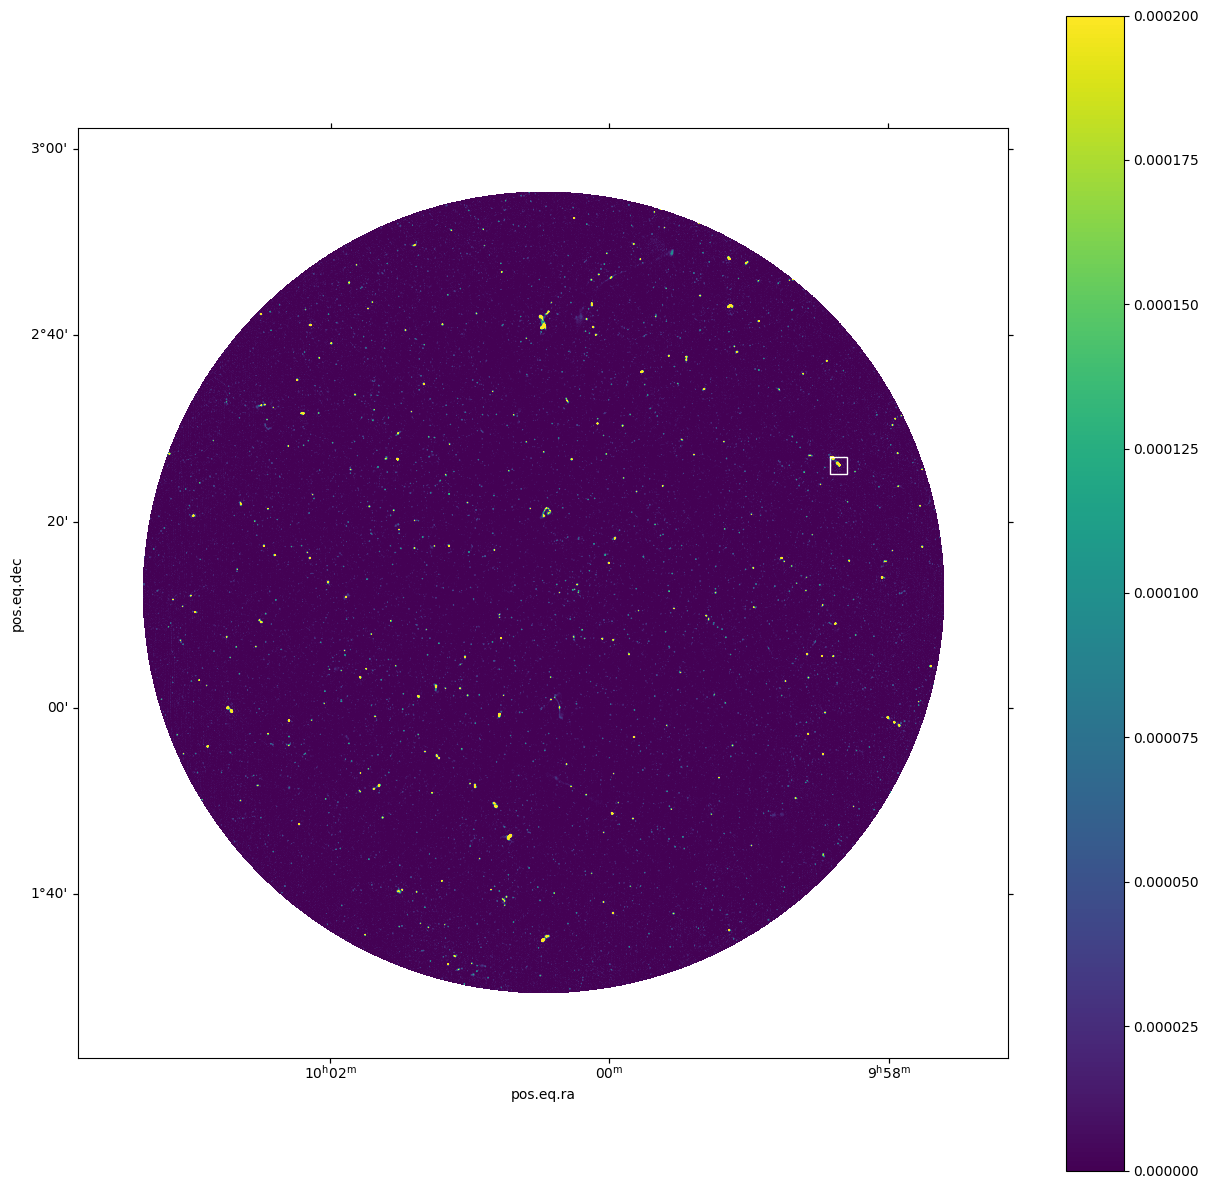

In [6]:
# Test astropy cutout
from astropy.nddata import Cutout2D
coords = df[["RA", "DEC"]].values
coords.shape
wcs = WCS(hdul[0].header).dropaxis(3).dropaxis(2) # Remove spurious axis (one of which is freq but mfs, one is polarisation stokes I).
origin = 0
positions = wcs.all_world2pix(coords, origin)
cutout = Cutout2D(np.squeeze(image), positions[0], (100, 100), wcs=wcs)
fig = plt.subplots(figsize=(15,15))
ax = plt.subplot(projection=wcs)
img = ax.imshow(np.squeeze(image), origin="lower", vmin=0.0, vmax=2.e-4)
plt.colorbar(img)
cutout.plot_on_original(color='white')
plt.show()

In [14]:
from torch.utils.data import DataLoader
from cata2data import CataData
from preprocessing import image_preprocessing, wcs_preprocessing, catalogue_preprocessing
catalogue_paths = [
    "data/MIGHTEE_Continuum_Early_Science_COSMOS_Level1.fits", 
    "data/MIGHTEE_Continuum_Early_Science_XMMLSS_Level1.fits"
]
image_paths = [
    "data/MIGHTEE_Continuum_Early_Science_COSMOS_r-1p2.app.restored.circ.fits", 
    "data/MIGHTEE_Continuum_Early_Science_XMMLSS_r-1p2_circ.hires.fits"
]
field_names = [
    "COSMOS", "XMMLSS"
]

### Create Data Set ###
mightee_data = CataData(
    catalogue_paths=catalogue_paths,
    image_paths = image_paths,
    field_names = field_names,
    cutout_width = 70,
    catalogue_preprocessing = catalogue_preprocessing,
    image_preprocessing = image_preprocessing
)

print(len(mightee_data))
train_dataloader = DataLoader(mightee_data, batch_size=64, shuffle=True)


1712


In [15]:
mightee_data.df

NAME          RA     E_RA      DEC    E_DEC     S_INT  \
0     J021957.31-044752.6   34.988819  0.00000 -4.79796  0.00000  0.044408   
1     J021500.55-045359.5   33.752300  0.00000 -4.89988  0.00000  0.042258   
2     J022415.09-052847.3   36.062889  0.00000 -5.47981  0.00000  0.040998   
3     J095821.54+022600.0  149.589783  0.00000  2.43335  0.00000  0.038022   
4     J100042.86+014612.9  150.178604  0.00000  1.77027  0.00000  0.034663   
...                   ...         ...      ...      ...      ...       ...   
1707  J095943.56+022010.8  149.931534  0.00012  2.33635  0.00047  0.000059   
1708  J021707.08-045038.0   34.279541  0.00017 -4.84391  0.00019  0.000058   
1709  J100100.39+020933.2  150.251663  0.00025  2.15924  0.00025  0.000055   
1710  J100053.98+020908.1  150.224930  0.00032  2.15227  0.00039  0.000054   
1711  J100040.15+021800.1  150.167328  0.00015  2.30006  0.00035  0.000048   

       E_S_INT    S_PEAK  E_S_PEAK        NU_EFF  ...  THETA_MAJ  E_THETA_MAJ  \
0     0.000010  0.039331  0.000005  1.322354e+09  ...    0.00093      0.00000   
1     0.000020  0.037542  0.000010  1.271161e+09  ...    0.00057      0.00000   
2     0.000021  0.036122  0.000011  1.259211e+09  ...    0.00081      0.00000   
3     0.000015  0.037699  0.000009  1.333992e+09  ...    0.00028      0.00000   
4     0.000017  0.022838  0.000007  1.352688e+09  ...    0.00197      0.00000   
...        ...       ...       ...           ...  ...        ...          ...   
1707  0.000014  0.000033  0.000005  1.369275e+09  ...    0.00468      0.00126   
1708  0.000010  0.000039  0.000004  1.343709e+09  ...    0.00306      0.00072   
1709  0.000012  0.000031  0.000005  1.372753e+09  ...    0.00364      0.00094   
1710  0.000014  0.000025  0.000005  1.373355e+09  ...    0.00436      0.00128   
1711  0.000010  0.000033  0.000004  1.373658e+09  ...    0.00402      0.00101   

      THETA_MIN  E_THETA_MIN  RESOLVED   ISL_RMS  GAUS_ID  SRC_ID  ISL_ID  \
0       0.00000      0.00000         1  0.000005    11378    9660   10759   
1       0.00000      0.00000         1  0.000010    20374   17342   19274   
2       0.00000      0.00000         1  0.000011     2741    2330    2591   
3       0.00014      0.00001         1  0.000009     9296    7674    8680   
4       0.00145      0.00000         1  0.000007     4192    3509    3927   
...         ...          ...       ...       ...      ...     ...     ...   
1707    0.00000      0.00000         1  0.000005     6896    5648    6408   
1708    0.00000      0.00000         1  0.000004    17306   14728   16392   
1709    0.00000      0.00000         1  0.000004     3605    3041    3391   
1710    0.00082      0.00114         1  0.000005     3893    3272    3657   
1711    0.00000      0.00000         1  0.000005     4476    3732    4180   

       field  
0     XMMLSS  
1     XMMLSS  
2     XMMLSS  
3     COSMOS  
4     COSMOS  
...      ...  
1707  COSMOS  
1708  XMMLSS  
1709  COSMOS  
1710  COSMOS  
1711  COSMOS  

[1712 rows x 30 columns]

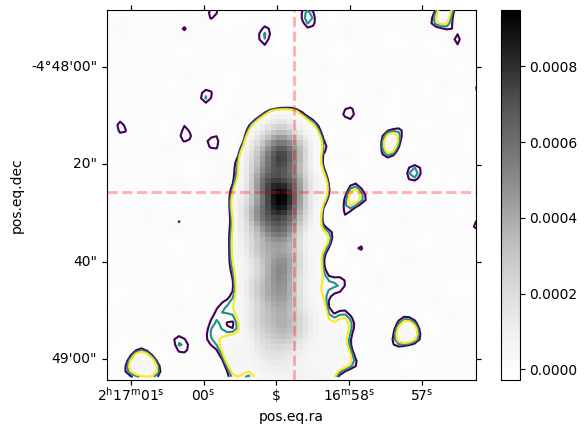

NAME         RA  E_RA     DEC    E_DEC     S_INT  \
100  J021658.88-044827.0  34.245369   0.0 -4.8075  0.00001  0.002616   

      E_S_INT    S_PEAK  E_S_PEAK        NU_EFF  ...  THETA_MAJ  E_THETA_MAJ  \
100  0.000014  0.001303  0.000005  1.341975e+09  ...    0.00327      0.00002   

     THETA_MIN  E_THETA_MIN  RESOLVED   ISL_RMS  GAUS_ID  SRC_ID  ISL_ID  \
100    0.00096      0.00002         1  0.000005    17554   14932   16624   

      field  
100  XMMLSS  

[1 rows x 30 columns]

In [18]:
idx = 100
mightee_data.plot(idx)
mightee_data.df.iloc[idx:idx+1]

In [9]:
mightee_data.wcs

{'COSMOS': WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---SIN'  'DEC--SIN'  
 CRVAL : 150.11916666667  2.205833333333302  
 CRPIX : 2726.0  2726.0  
 PC1_1 PC1_2  : 1.0  0.0  
 PC2_1 PC2_2  : 0.0  1.0  
 CDELT : -0.00030555555555556  0.00030555555555556  
 NAXIS : 5450  5450  1  1,
 'XMMLSS': WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 35.15223662  -4.833701903  
 CRPIX : 4601.5  2352.0  
 NAXIS : 9203  4706}

/tmp/ipykernel_1890877/2209926000.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=wcs)


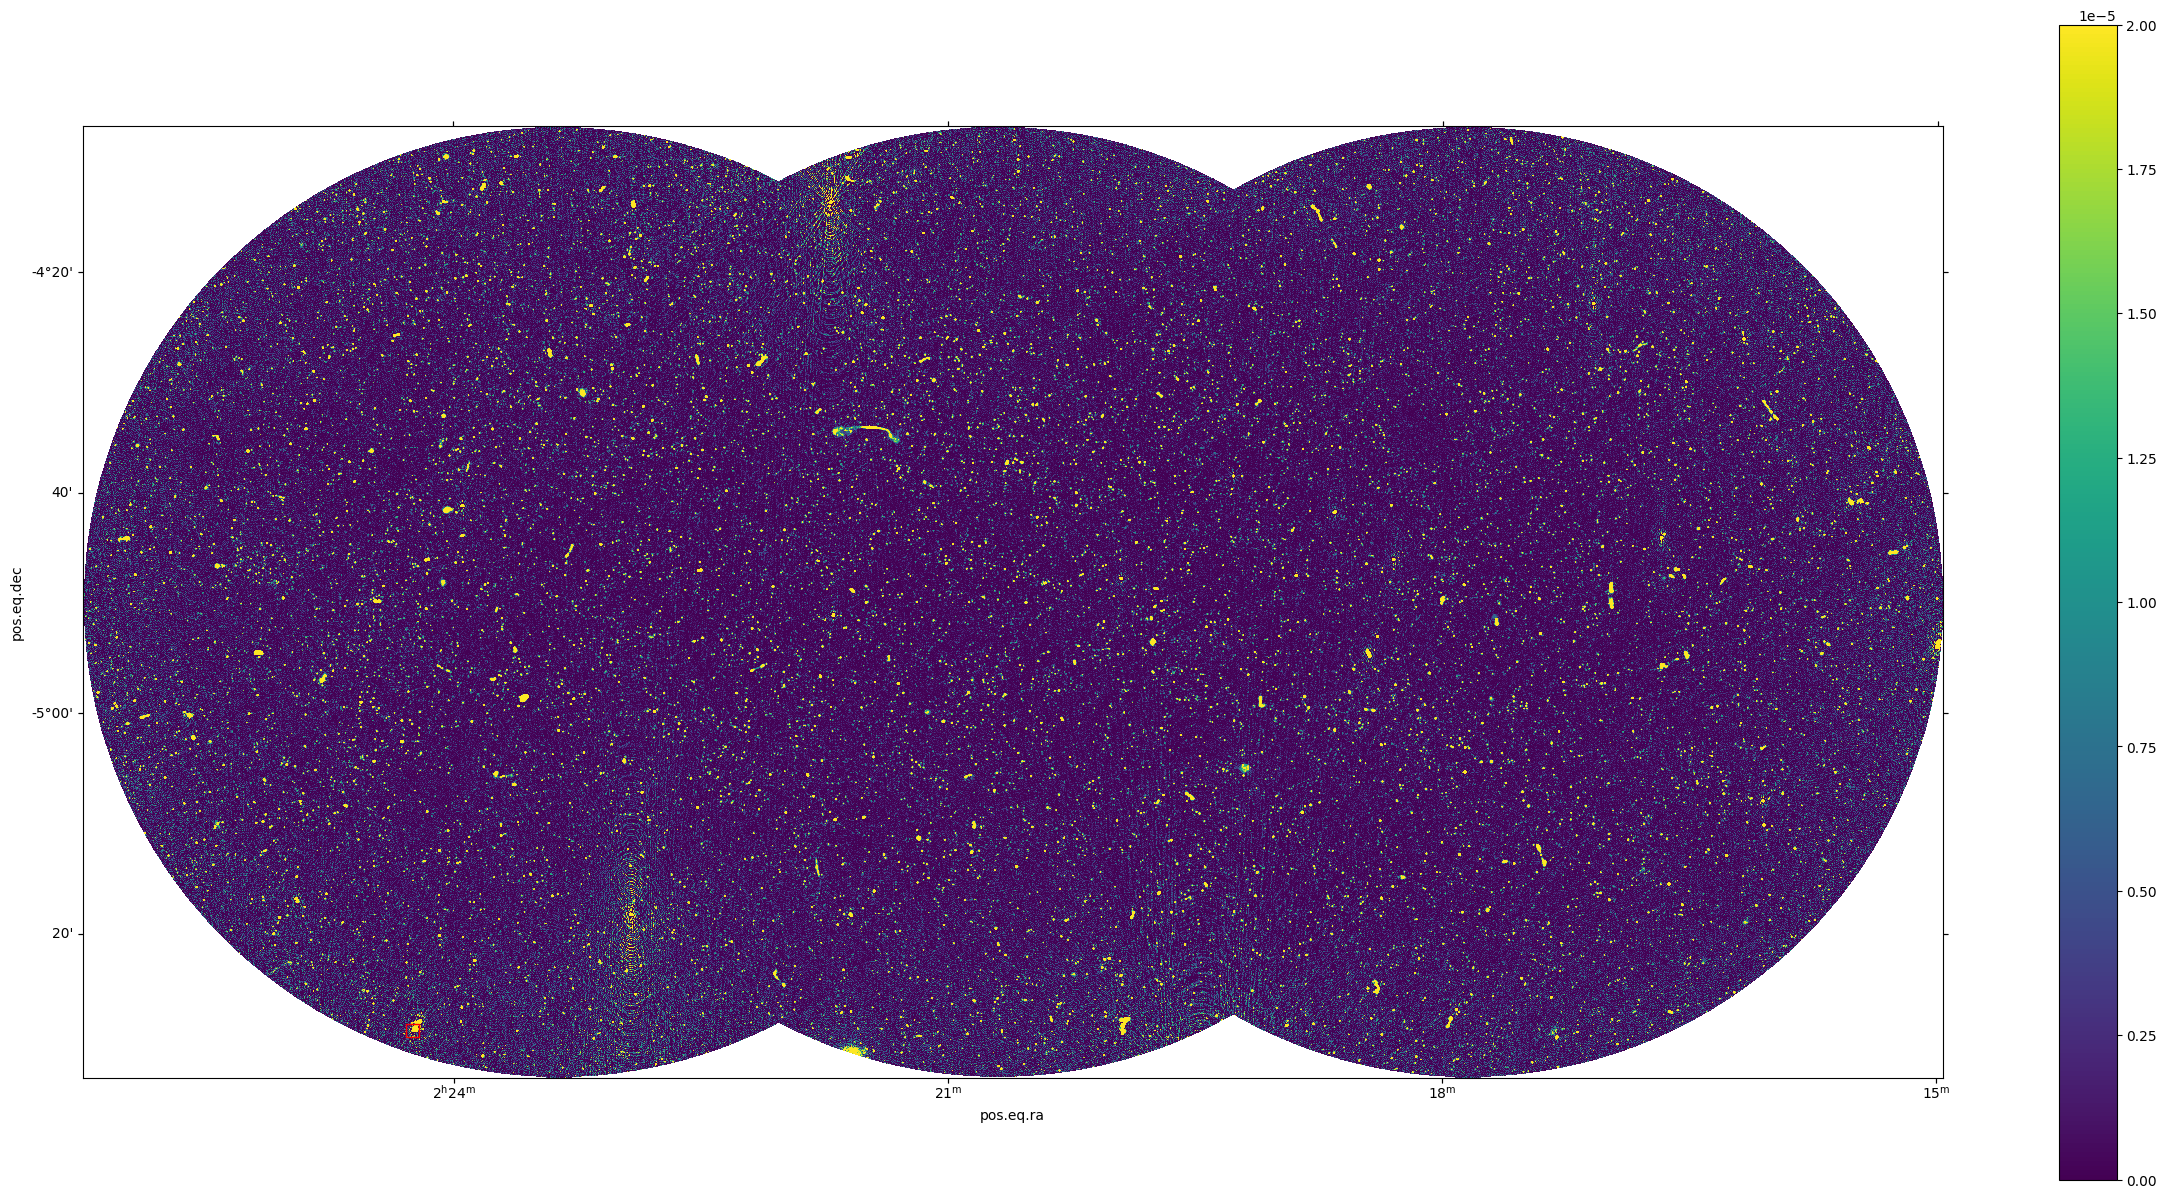

In [10]:
## Demonstration of box plotting
# Could loop over something like: mightee_data.df[mightee_data.df["field"]=="XMMLSS"].index
origin = 0
cutout_size = 64
entry = mightee_data.df.iloc[idx]
wcs = mightee_data.wcs[entry.field]

positions = wcs.all_world2pix(entry[["RA","DEC"]].values[np.newaxis,:].astype(np.float64), origin)
image =mightee_data.images[entry.field]
cutout = Cutout2D(mightee_data.images[entry.field], positions[0], (cutout_size, cutout_size), wcs=wcs)
fig = plt.subplots(figsize=(30,15))
ax = plt.subplot(projection=wcs)
img = ax.imshow(np.squeeze(image), origin="lower", vmin=0.0, vmax=2.e-5)
plt.colorbar(img)
cutout.plot_on_original(color='red')
plt.show()